# <center>Homework 01. Разведочный анализ данных – Exploratory Data Analysis (EDA)</center>

Рассмотрим датасет, состоящий из оценок одной тысячи американских студентов старшей школы. Данный датаст можно скачать [тут](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data).
Описане датасета:
- **gender** --- пол студента (female/male)
- **reace/ethnicity** --- принадлежность к какой-то расе/национальности (A, B, C, D или E (однако автор датасета не указал, принадлежность к какой именно расе обозначают эти буквы))
- **parental level of education** --- уровень образования родителей студента
- **lunch** --- информация о том, какой обед получал студент в школе
- **test preparation course** --- информация о прохождении студентом подготовительных курсов
- **math score** --- балл студента за экзамен по математике (от 0 до 100)
- **reading score** --- балл студента за экзамен по чтению (от 0 до 100)
- **writing score** --- балл стдента за экзамен по письму (от 0 до 100)


Требуется решить задачию классификации. Необходимо уметь предсказывать оценку по разным предметам исходя из информации о расе студента, образовании его родителей, прохождении подготовительных курсов, получаемом студентом питании в школе, зная оценки по другим предметам. В качестве целового параметра был взят **math score**.

Замечание. При анализе данных практически не учитывался такой параметр, как **lunch**.

Столбцы в датасете: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
   gender race/ethnicity parental level of education         lunch  \
0  female              B           bachelor's degree      standard   
1  female              C                some college      standard   
2  female              B             master's degree      standard   
3    male              A          associate's degree  free/reduced   
4    male              C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    n

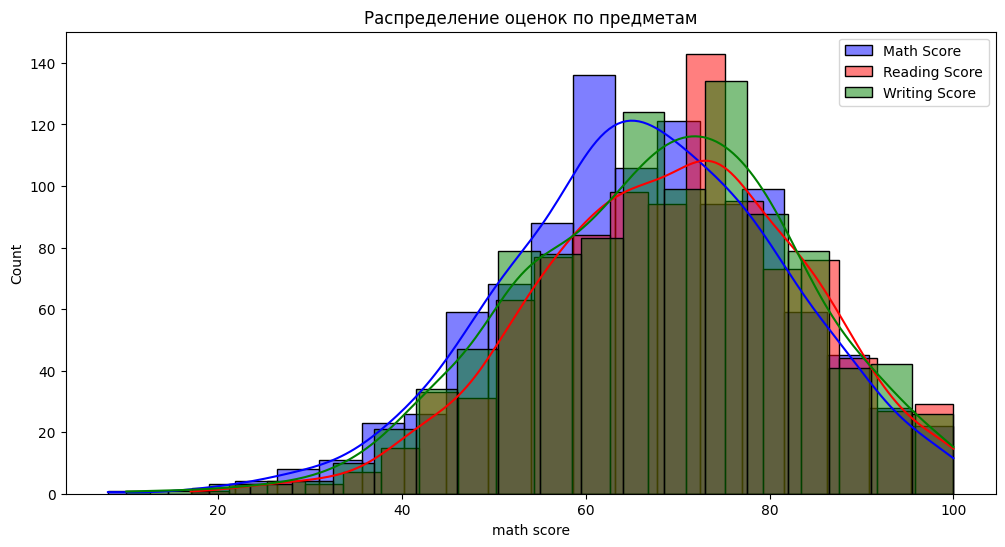

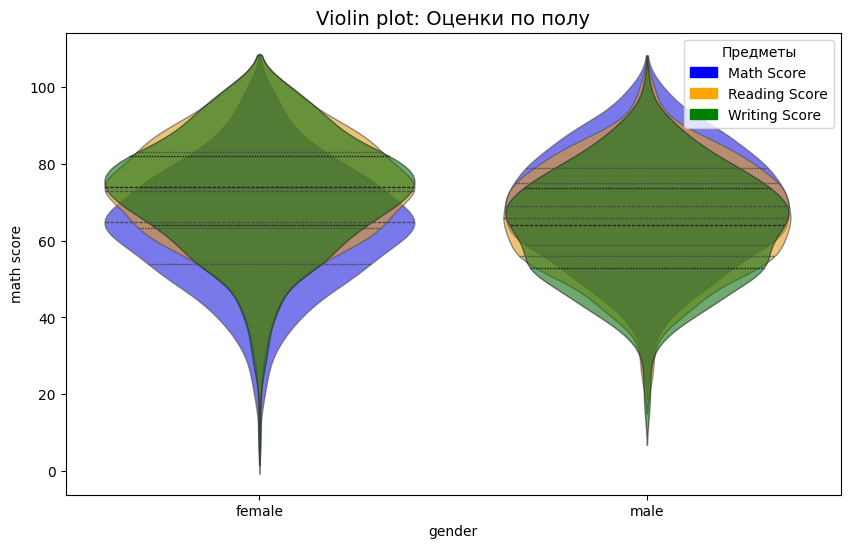

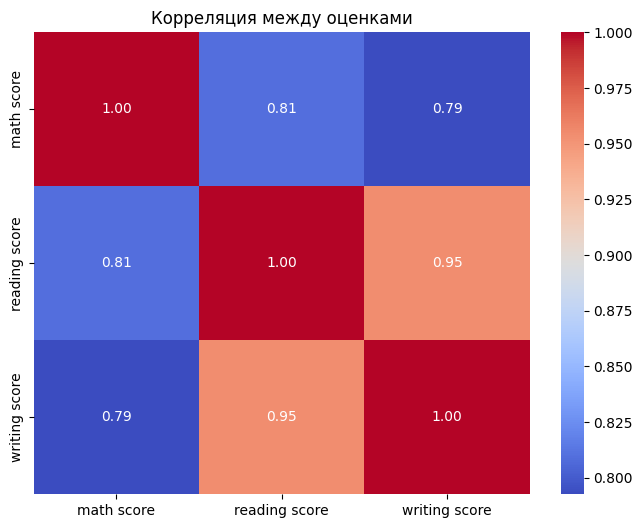

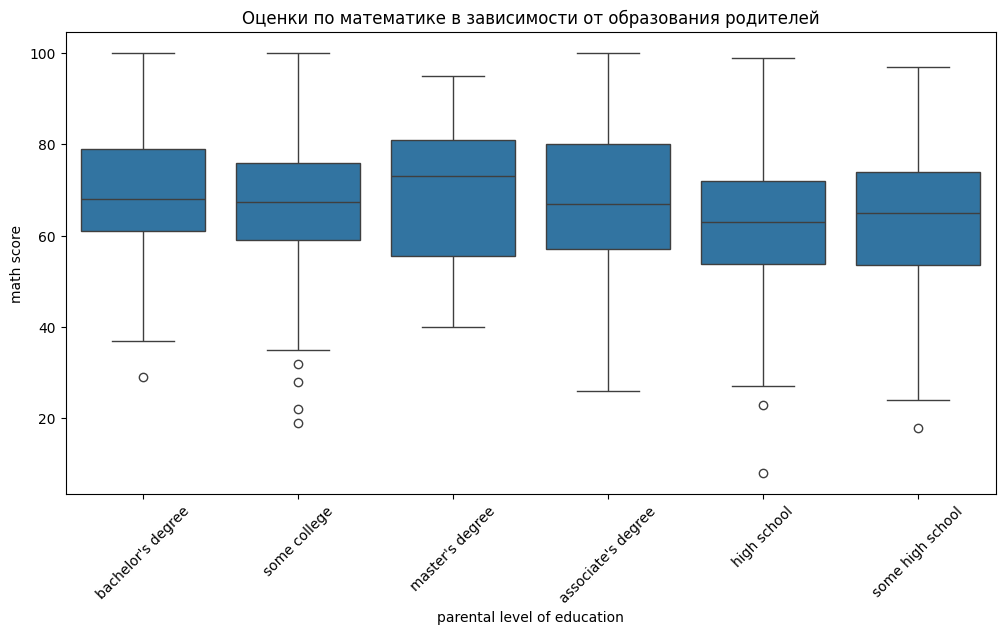

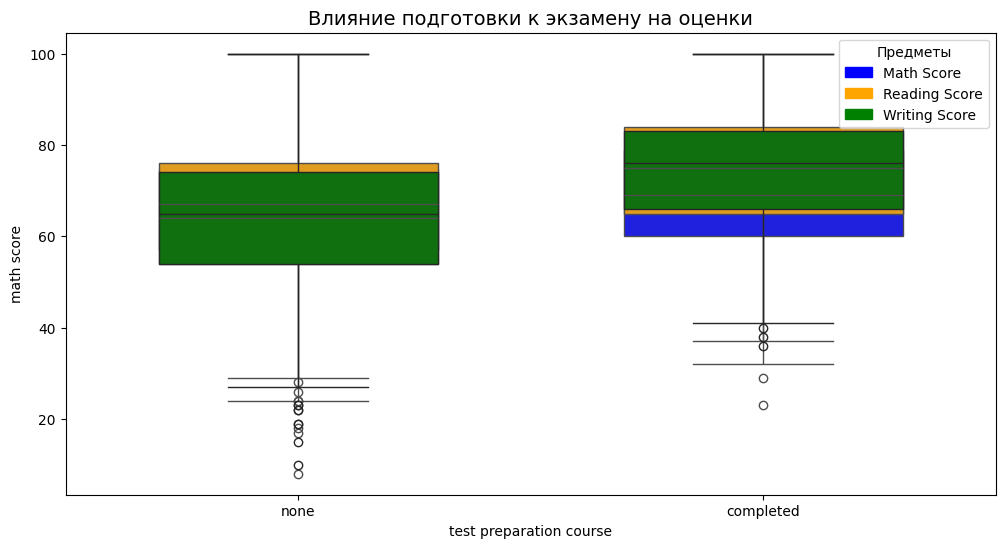

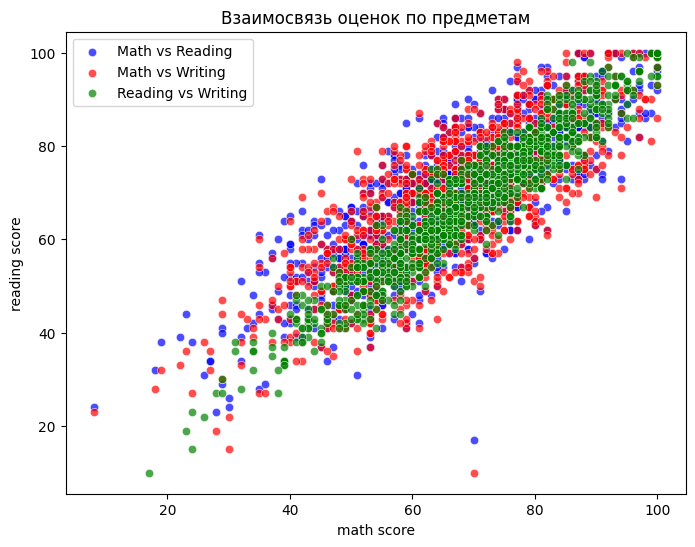


--- Выводы ---
1. Распределение оценок примерно нормальное, но есть небольшой перекос.
2. Уровень образования родителей может влиять на успехи студента.
3. Те, кто прошли тестовую подготовку, имеют в среднем более высокие баллы.
4. Пол может оказывать влияние на баллы по математике.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные с правильным разделителем
file_path = "/Users/aleksandrboda/Documents/StudentsPerformance.csv"  # Замени на свой путь к файлу

df = pd.read_csv(file_path, sep=';')

# Проверим данные
print("Столбцы в датасете:", df.columns)
df.columns = df.columns.str.strip()  # Убираем лишние пробелы, если есть
print(df.head())

# Описательная статистика
print(df.describe())

# Гистограммы распределения оценок
plt.figure(figsize=(12, 6))
sns.histplot(df['math score'], kde=True, bins=20, color='blue', label='Math Score')
sns.histplot(df['reading score'], kde=True, bins=20, color='red', label='Reading Score')
sns.histplot(df['writing score'], kde=True, bins=20, color='green', label='Writing Score')
plt.legend()
plt.title("Распределение оценок по предметам")
plt.show()

# Violinplot: распределение оценок в зависимости от пола

plt.figure(figsize=(10, 6))

# Построим violinplot для трех предметов с разными цветами
sns.violinplot(x=df["gender"], y=df["math score"], color="blue", inner="quartile", linewidth=1, alpha=0.6)
sns.violinplot(x=df["gender"], y=df["reading score"], color="orange", inner="quartile", linewidth=1, alpha=0.6)
sns.violinplot(x=df["gender"], y=df["writing score"], color="green", inner="quartile", linewidth=1, alpha=0.6)

import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color="blue", label="Math Score"),
    mpatches.Patch(color="orange", label="Reading Score"),
    mpatches.Patch(color="green", label="Writing Score"),
]
plt.legend(handles=legend_patches, title="Предметы", loc="upper right")

plt.title("Violin plot: Оценки по полу", fontsize=14)

plt.show()



# Тепловая карта корреляции между оценками
plt.figure(figsize=(8, 6))
corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция между оценками")
plt.show()

# Boxplot: Влияние уровня образования родителей
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title("Оценки по математике в зависимости от образования родителей")
plt.show()

# Влияние подготовки к экзамену
plt.figure(figsize=(12, 6))

sns.boxplot(x='test preparation course', y='math score', data=df, color="blue", width=0.6)
sns.boxplot(x='test preparation course', y='reading score', data=df, color="orange", width=0.6)
sns.boxplot(x='test preparation course', y='writing score', data=df, color="green", width=0.6)

legend_patches = [
    mpatches.Patch(color="blue", label="Math Score"),
    mpatches.Patch(color="orange", label="Reading Score"),
    mpatches.Patch(color="green", label="Writing Score"),
]
plt.legend(handles=legend_patches, title="Предметы", loc="upper right")

plt.title("Влияние подготовки к экзамену на оценки", fontsize=14)

plt.show()

# Взаимосвязь оценок между разными предметами
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='reading score', data=df, alpha=0.7, color='blue')
sns.scatterplot(x='math score', y='writing score', data=df, alpha=0.7, color='red')
sns.scatterplot(x='reading score', y='writing score', data=df, alpha=0.7, color='green')
plt.legend(["Math vs Reading", "Math vs Writing", "Reading vs Writing"])
plt.title("Взаимосвязь оценок по предметам")
plt.show()





Анализ зависимости оценок от различных факторов
1. Распределение оценок по предметам
Распределение баллов по математике, чтению и письму близко к нормальному.
Средние оценки выше по чтению и письму, чем по математике.
Наблюдается высокая корреляция между предметами, что говорит о том, что успешные студенты показывают хорошие результаты во всех дисциплинах.
2. Зависимость оценок от пола
Мальчики показывают более широкий разброс оценок по математике, но их медианное значение выше.
Девочки в среднем лучше справляются с заданиями по чтению и письму.
Различия в распределениях могут указывать на разные подходы к обучению среди полов.
3. Корреляция между предметами
Чтение и письмо имеют наибольшую корреляцию (0.95), что логично, так как навыки в этих областях тесно связаны.
Математика также связана с другими дисциплинами (0.79–0.81), но в меньшей степени. Это может указывать на то, что успехи в математике требуют специфических навыков.
4. Влияние образования родителей
Студенты, чьи родители имеют степень магистра или бакалавра, в среднем показывают лучшие результаты по математике.
Студенты с родителями, закончившими только школу, чаще получают низкие оценки.
Можно предположить, что более высокий уровень образования родителей способствует лучшей академической подготовке их детей.
Выводы
- Пол влияет на распределение оценок: мальчики лучше в математике, девочки — в гуманитарных дисциплинах.
- Оценки по предметам сильно коррелируют: успех в одном предмете часто означает успех в других.
- Образование родителей играет важную роль: дети из семей с высшим образованием показывают лучшие результаты.

